In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#reading the 2 dataset and concatenating them
df1 = pd.read_csv('green_tripdata_2018-02.csv')
df2 = pd.read_csv('green_tripdata_2018-03.csv')
frames = [df1, df2]
df = pd.concat(frames)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2018-02-01 0:39,2018-02-01 0:39,N,5.0,97.0,65.0,1.0,0.00,20.0,0.0,0.0,3.00,0.0,NaN,0.0,23.00,1.0,2.0
2,2.0,2018-02-01 0:58,2018-02-01 1:05,N,1.0,256.0,80.0,5.0,1.60,7.5,0.5,0.5,0.88,0.0,NaN,0.3,9.68,1.0,1.0
3,2.0,2018-02-01 0:56,2018-02-01 1:18,N,1.0,25.0,95.0,1.0,9.60,28.5,0.5,0.5,5.96,0.0,NaN,0.3,35.76,1.0,1.0
4,2.0,2018-02-01 0:12,2018-02-01 0:15,N,1.0,61.0,61.0,1.0,0.73,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0


In [31]:
df.count()

VendorID                 1606537
lpep_pickup_datetime     1606537
lpep_dropoff_datetime    1606537
store_and_fwd_flag       1606537
RatecodeID               1606537
PULocationID             1606537
DOLocationID             1606537
passenger_count          1606537
trip_distance            1606537
fare_amount              1606537
extra                    1606537
mta_tax                  1606537
tip_amount               1606537
tolls_amount             1606537
ehail_fee                      0
improvement_surcharge    1606537
total_amount             1606537
payment_type             1606537
trip_type                1606537
dtype: int64

In [32]:
#dropping the parameter as it has no value
df = df.drop('ehail_fee', axis=1)

In [33]:
df['store_and_fwd_flag'].value_counts()


N    1604188
Y       2349
Name: store_and_fwd_flag, dtype: int64

In [34]:
#converting the flag to 1 and 0
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(lambda x: 1 if x == 'N' else 0)
df = df.rename(columns={'store_and_fwd_flag':'dispatch'})
df['dispatch'].value_counts()

1    1604188
0       2351
Name: dispatch, dtype: int64

In [36]:

df.head(5)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,dispatch,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2018-02-01 0:39,2018-02-01 0:39,1,5.0,97.0,65.0,1.0,0.00,20.0,0.0,0.0,3.00,0.0,0.0,23.00,1.0,2.0
2,2.0,2018-02-01 0:58,2018-02-01 1:05,1,1.0,256.0,80.0,5.0,1.60,7.5,0.5,0.5,0.88,0.0,0.3,9.68,1.0,1.0
3,2.0,2018-02-01 0:56,2018-02-01 1:18,1,1.0,25.0,95.0,1.0,9.60,28.5,0.5,0.5,5.96,0.0,0.3,35.76,1.0,1.0
4,2.0,2018-02-01 0:12,2018-02-01 0:15,1,1.0,61.0,61.0,1.0,0.73,4.5,0.5,0.5,0.00,0.0,0.3,5.80,2.0,1.0


In [20]:
#extracting the date and time of the pickup and dropoff date time
df['PUD'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.date
df['PUT'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.time
df['DOD'] = pd.to_datetime(df['lpep_dropoff_datetime']).dt.date
df['DOT'] = pd.to_datetime(df['lpep_dropoff_datetime']).dt.time

In [21]:
#Grouping long trips
long_trips = df[df['PUD'] != df['DOD']]
print("Count of long trips: ", long_trips.count())


Count of long trips:  VendorID                 19506
lpep_pickup_datetime     19506
lpep_dropoff_datetime    19506
dispatch                 19508
RatecodeID               19506
PULocationID             19506
DOLocationID             19506
passenger_count          19506
trip_distance            19506
fare_amount              19506
extra                    19506
mta_tax                  19506
tip_amount               19506
tolls_amount             19506
improvement_surcharge    19506
total_amount             19506
payment_type             19506
trip_type                19506
PUD                      19506
PUT                      19506
DOD                      19506
DOT                      19506
dtype: int64


In [22]:
agg = df.groupby(df['PUD']).aggregate('sum')

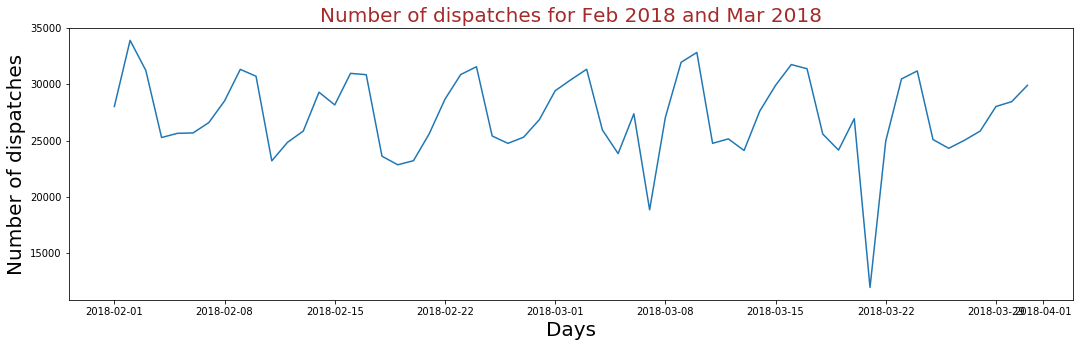

In [38]:
#Plotting the dispatches made each day
plt.figure(figsize=(18,5))
ax = plt.gca()
ax.set_xlabel('Days',fontsize=20)
ax.set_ylabel('Number of dispatches',fontsize=20)
ax.set_title('Number of dispatches for Feb 2018 and Mar 2018',fontsize=20, color='brown')

plt.plot(agg['dispatch'])

location_pattern['passenger_count'].max():  135790.0


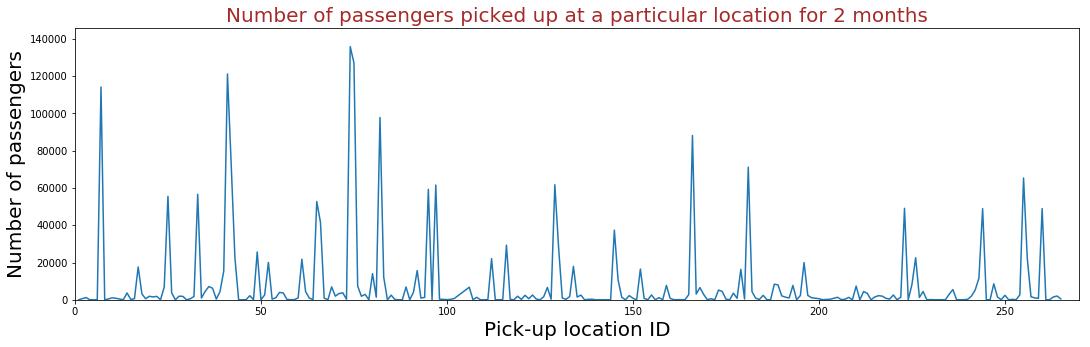

In [39]:
#Plotting the number of passengers picked up at each location
location_pattern = df.groupby(df['PULocationID']).aggregate('sum')
plt.figure(figsize=(18,5))
ax = plt.gca()
ax.set_xlabel('Pick-up location ID',fontsize=20)
ax.set_xlim(0,df['PULocationID'].max()+ 5)
ax.set_ylabel('Number of passengers',fontsize=20)
print("location_pattern['passenger_count'].max(): ", location_pattern['passenger_count'].max())
ax.set_ylim(0,location_pattern['passenger_count'].max()+ 10000)
ax.set_title('Number of passengers picked up at a particular location for 2 months',fontsize=20, color='brown')
plt.plot(location_pattern['passenger_count'])

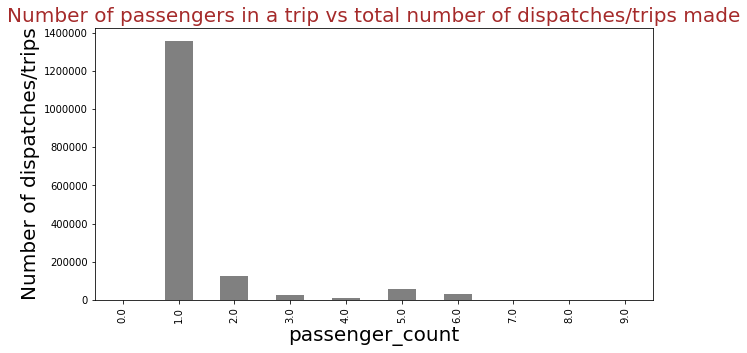

In [40]:
#plotting the number of passengers in a trip
passenger_count = df.groupby(df['passenger_count']).size()
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_xlabel('Number of passengers in a ride',fontsize=20)
ax.set_ylabel('Number of dispatches/trips',fontsize=20)
ax.set_title('Number of passengers in a trip vs total number of dispatches/trips made',fontsize=20, color='brown')
ax = passenger_count.plot.bar(color = 'grey')

In [ ]:
#saving the clean data in csv format
df.to_csv('green_clean_2018.csv', index=False)
df.info()